In [1]:
library(tidyverse)
library(clusterProfiler)
library(org.Mm.eg.db)
library(enrichplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplif

In [4]:
library(readxl)
exclusive_df <- read_excel("/home/wpy/stereoseq/20240702-Exclusive/all_genes_all_4_cancers_Correction_normalized_differ.xlsx", sheet = 1)


In [33]:
exclusive_df <- exclusive_df[order(exclusive_df$`Ex-Co`, decreasing = TRUE),]
top_exclusive <- c(exclusive_df %>% head(100) %>% pull(mouse.gene1), exclusive_df %>% head(100) %>% pull(mouse.gene1.1)) %>% unique()
top_colocalized <- c(exclusive_df %>% tail(100) %>% pull(mouse.gene1), exclusive_df %>% tail(100) %>% pull(mouse.gene1.1)) %>% unique()


In [34]:
exclusive_go <- enrichGO(gene = top_exclusive,
                         OrgDb = org.Mm.eg.db,
                         keyType = "SYMBOL",
                         ont = "MF",
                         pvalueCutoff = 0.05,
                         qvalueCutoff = 0.05)

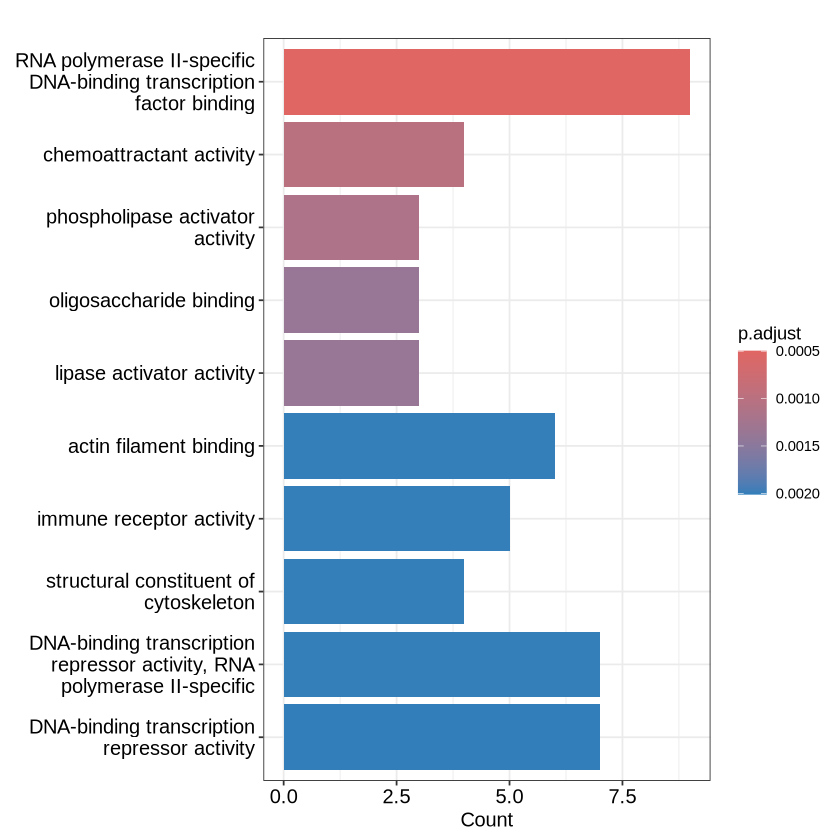

In [36]:
barplot(exclusive_go, showCategory = 10)

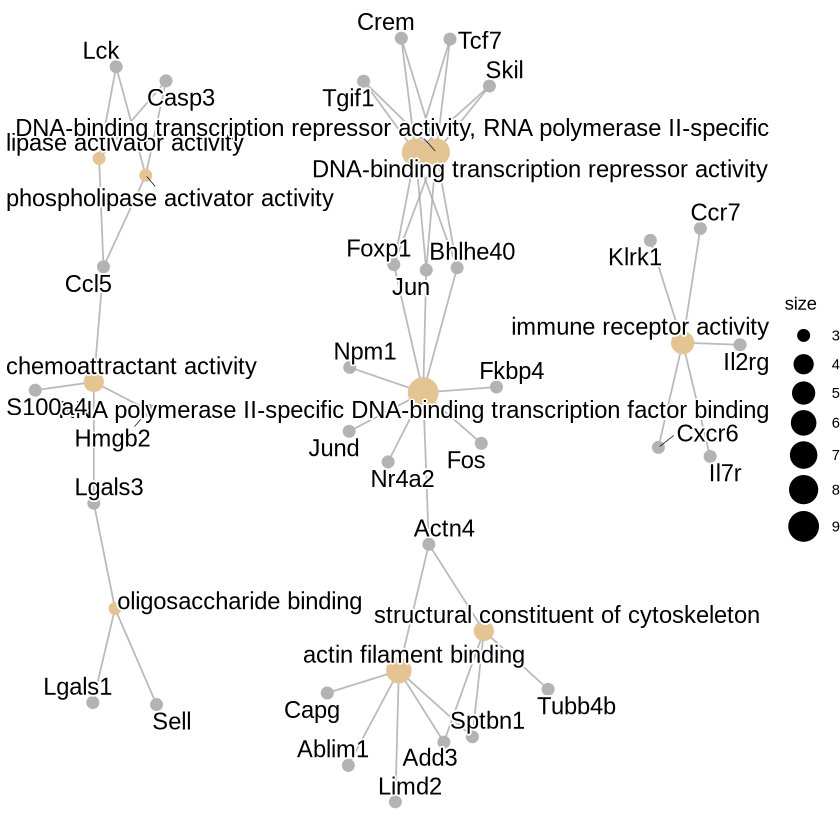

In [47]:
edox <- setReadable(exclusive_go, OrgDb = org.Mm.eg.db, keyType = "SYMBOL")
p1 <- cnetplot(edox, categorySize="pvalue", showCategory = 10)
print(p1)

In [54]:
p1$data %>% write.csv("exclusive_cnetplot_edges.csv", row.names = FALSE)
p2$data %>% write.csv("colocalized_cnetplot_edges.csv", row.names = FALSE)

In [39]:
colocalized_go <- enrichGO(gene = top_colocalized,
                         OrgDb = org.Mm.eg.db,
                         keyType = "SYMBOL",
                         ont = "MF",
                         pvalueCutoff = 0.05,
                         qvalueCutoff = 0.05)

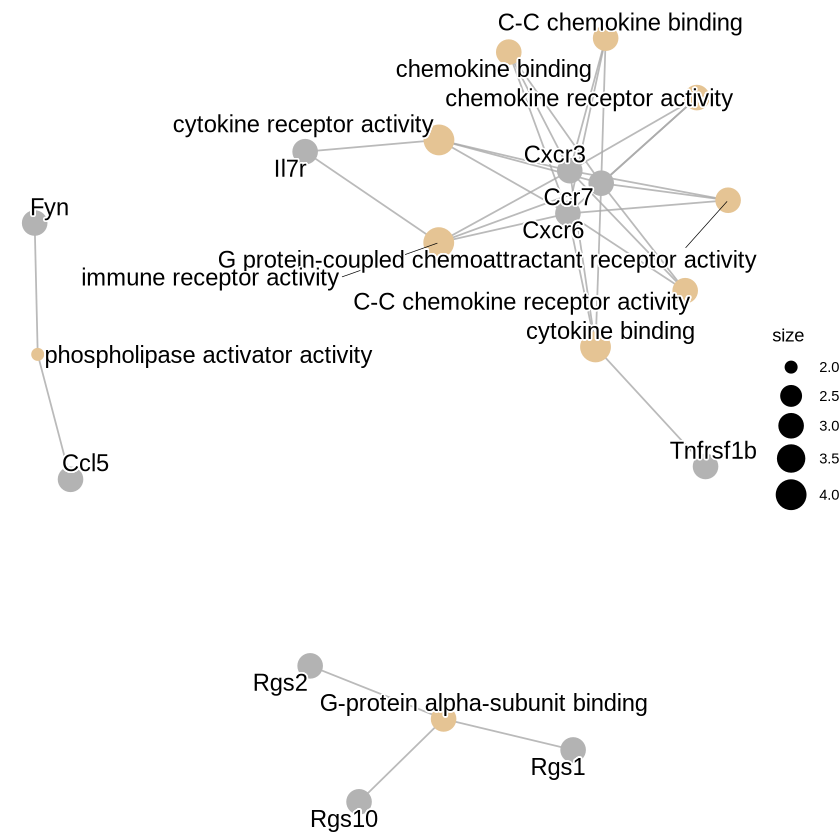

In [46]:
edox <- setReadable(colocalized_go, OrgDb = org.Mm.eg.db, keyType = "SYMBOL")
p2 <- cnetplot(edox, categorySize="pvalue", showCategory = 10)
print(p2)